In [3]:
from classes_V3 import *

In [4]:
d = DC_IV('sample_6')

In [5]:
#d.draw_all_graphs()

Text(1.2, 2e-05, '$I_{c.c.} = 10^{-5} \\;A$')

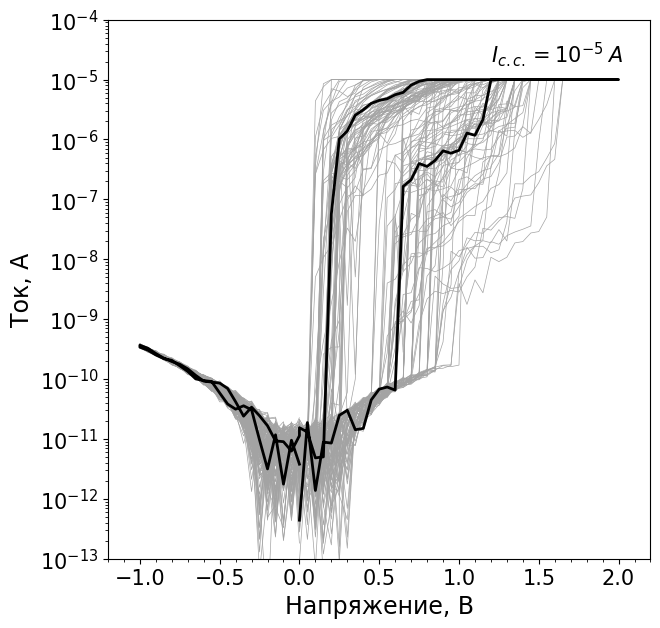

In [6]:
fig, ax = plt.subplots(figsize = [7,7])

plt.rcParams.update({'font.family':'serif'})

d.draw_multiple_lines('G8-100', ax, measurs=[i for i in range(15,127) if i not in [j for j in range(27,66)]], linewidth = 0.5, color = '#a3a3a3')
d.draw_single_line('G8-100', ax, 70, color = 'k', linewidth = 2)
ax.set(yscale='log', xlim=[-1.2, 2.2], ylim=[10**-(13), 10**-4])
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.tick_params(labelsize=15)
ax.set_ylabel('Ток, А', size = 17)
ax.set_xlabel('Напряжение, В', size = 17)
ax.text(1.2, 2 * 10 ** -5, r'$I_{c.c.} = 10^{-5} \;A$', size = 15)

#plt.savefig('final_typical.png', dpi = 300, bbox_inches = 'tight')

In [7]:
d_2 = DC_IV('sample_6_2')

In [8]:
#d_2.draw_contact_graphs('E16-100', 'E16-100_graphs')
d_2.delete_measurs('E16-100', measur=[1108,802,81,44,42,37])
d_2.delete_measurs('E16-100', measur=[i for i in range(1,25)])
d_2.delete_measurs('E16-100', measur=[i for i in range(1131,1161)])

Text(0.5, 2e-05, '$I_{c.c.} = 10^{-5} \\;A$')

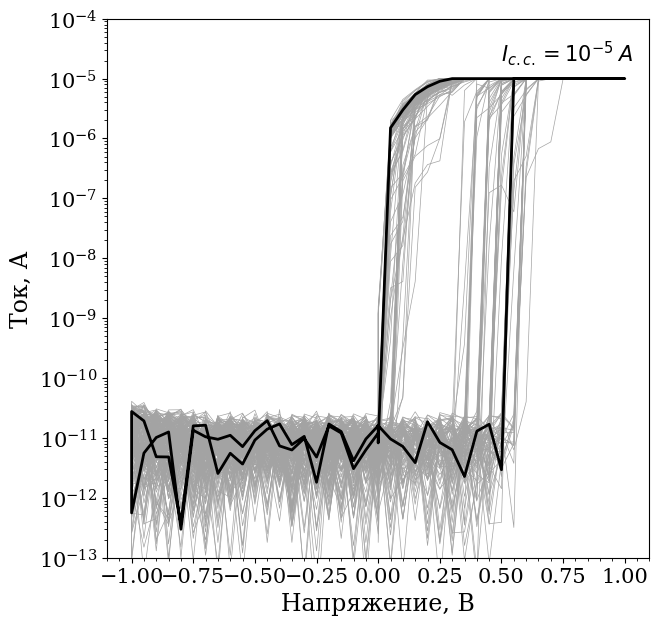

In [9]:
fig, ax = plt.subplots(figsize = [7,7])

y_major = ticker.LogLocator(numticks = 20)
y_minor = ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)

d_2.draw_multiple_lines('E16-100', ax, measurs=[i for i in range(400, 500)], linewidth = 0.5, color = '#a3a3a3')
d_2.draw_single_line('E16-100', ax, 100, color = 'k', linewidth = 2)
ax.set(yscale='log', xlim=[-1.1, 1.1], ylim=[10**-(13), 10**-4])
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(y_major)
ax.yaxis.set_minor_locator(y_minor)
ax.tick_params(labelsize=15)
ax.set_ylabel('Ток, А', size = 17)
ax.set_xlabel('Напряжение, В', size = 17)
ax.text(0.5, 2 * 10 ** -5, r'$I_{c.c.} = 10^{-5} \;A$', size = 15)

#plt.savefig('ff_typical.png', dpi = 300, bbox_inches = 'tight')

In [10]:
I = d_2.get_on_off_current('E16-100', 0.2)

In [11]:
I_on = []
I_off = []
for i in range(len(I['off'])):
    if I['on'][i] != 0:
        I_on.append(I['off'][i])
        I_off.append(I['on'][i])

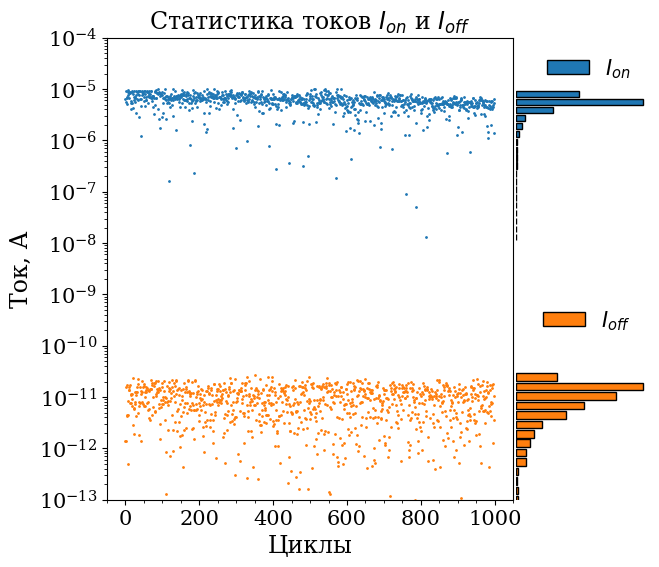

In [12]:
fig = plt.figure(figsize=(7, 6))
gs = GridSpec(ncols=4, nrows=2, figure=fig)

ax_1 = fig.add_subplot(gs[:,:3])
ax_2 = fig.add_subplot(gs[0,3])
ax_3 = fig.add_subplot(gs[1,3])

gs.update(wspace=0.02)

y_major = ticker.LogLocator(numticks = 10)
y_minor = ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 20)

ax_1.scatter(range(1000), I['off'][:1000], s = 1)
ax_1.scatter(range(1000), np.abs(I['on'][:1000]), s = 1)
ax_1.set(yscale='log', xlim=[-50, 1050], ylim=[10**-(13), 10**-4])
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax_1.yaxis.set_major_locator(ticker.FixedLocator([10**-13,10**-12,10**-11,10**-10,10**-9,10**-8,10**-7,10**-6,10**-5,10**-4]))
ax_1.yaxis.set_minor_locator(y_minor)
ax_1.set_xlabel('Циклы', size = 17)
ax_1.set_ylabel('Ток, А', size = 17)
ax_1.tick_params(labelsize=15)
ax_1.set_title(r'Статистика токов $I_{on}$ и $I_{off}$', size = 17)

bins_1 = np.logspace(np.log10(min(I['off'][:1000])), np.log10(max(I['off'][:1000])), 20)
ax_2.hist(I['off'][:1000], bins=bins_1, orientation='horizontal', label = r'$I_{on}$', rwidth=0.8, edgecolor = 'k')
ax_2.set(ylim=[10**-(8), 10**-4], yscale='log')
ax_2.axis('off')
ax_2.legend(frameon = False, fontsize = 15)

bins_2 = np.logspace(np.log10(min(np.abs(I_off[:1000]))), np.log10(max(np.abs(I_off[:1000]))), 20)
ax_3.hist(np.abs(I_off[:1000]), bins=bins_2, orientation='horizontal', label = r'$I_{off}$', rwidth=0.8, edgecolor = 'k', color ='tab:orange')
ax_3.set(ylim=[10**-(13), 10**-9], yscale='log')
ax_3.axis('off')
ax_3.legend(frameon = False, fontsize = 15)

plt.savefig('current_stat.png', dpi = 300, bbox_inches = 'tight')

In [13]:
bins_2 = np.logspace(np.log10(min(np.abs(I_on[:1000]))), np.log10(max(np.abs(I_on[:1000]))), 20)
ax_3.hist(np.abs(I['on'][:1000]), bins=bins_2, orientation='horizontal', label = r'$V_{h}$', rwidth=0.8, edgecolor = 'k', log=True)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([1.33000002e-08, 1.88463771e-08, 2.67057085e-08, 3.78425448e-08,
        5.36236735e-08, 7.59858613e-08, 1.07673547e-07, 1.52575656e-07,
        2.16202880e-07, 3.06363981e-07, 4.34124137e-07, 6.15162936e-07,
        8.71698683e-07, 1.23521517e-06, 1.75032561e-06, 2.48024781e-06,
        3.51456276e-06, 4.98020858e-06, 7.05705920e-06, 9.99999975e-06]),
 <BarContainer object of 19 artists>)

In [14]:
V = d_2.get_ts_on_off_voltage('E16-100', 'p', 0.2)

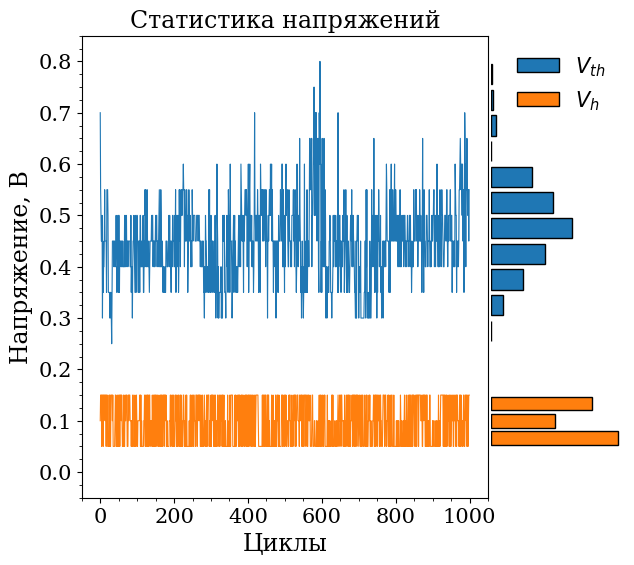

In [15]:
fig = plt.figure(figsize=(7, 6))
gs = GridSpec(ncols=4, nrows=1, figure=fig)

ax_1 = fig.add_subplot(gs[:3])
ax_2 = fig.add_subplot(gs[3])

gs.update(wspace=0.02)

ax_1.plot(range(1000), V[0][:1000], linewidth = 0.8)
ax_1.plot(range(1000), V[1][:1000], linewidth = 0.8)
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax_1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax_1.yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax_1.set(xlim=[-50, 1050], ylim=[-0.05, 0.85])
ax_1.set_xlabel('Циклы', size = 17)
ax_1.set_ylabel('Напряжение, В', size = 17)
ax_1.tick_params(labelsize=15)
ax_1.set_title('Статистика напряжений', size = 17)

ax_2.hist(V[0], bins=11, orientation='horizontal', label = r'$V_{th}$', rwidth=0.8, edgecolor = 'k')
ax_2.hist(V[1], bins=3, orientation='horizontal', label = r'$V_{h}$', rwidth=0.8, edgecolor = 'k')
ax_2.set(ylim=[-0.05, 0.85])
ax_2.axis('off')
ax_2.legend(frameon = False, fontsize = 15)

plt.savefig('voltage_stat.png', dpi = 300, bbox_inches = 'tight')

In [21]:
s = pd.read_csv('7.data', delimiter='   ', engine='python', skiprows=13, header=None)
t = s[0]
v = s[1]

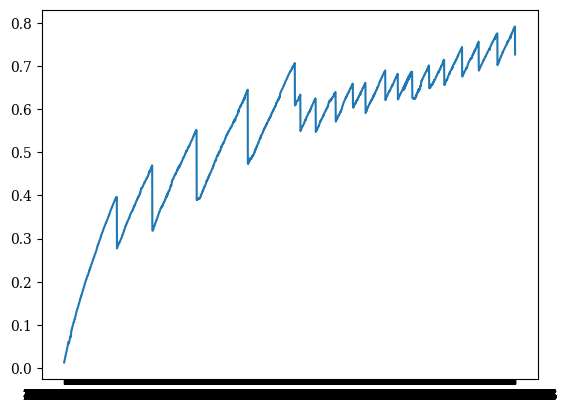

In [22]:
plt.plot(t, v)